In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
from sklearn.datasets import load_boston

In [276]:
bostan = load_boston() 

In [277]:
# prepare the dataframe
data = pd.DataFrame(bostan.data,columns = bostan.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [278]:
data['house_price'] = bostan.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Basic Analysis

In [322]:
# check data types of features and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    float64
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    float64
 9   TAX          506 non-null    float64
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  house_price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [281]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### EDA

<AxesSubplot:>

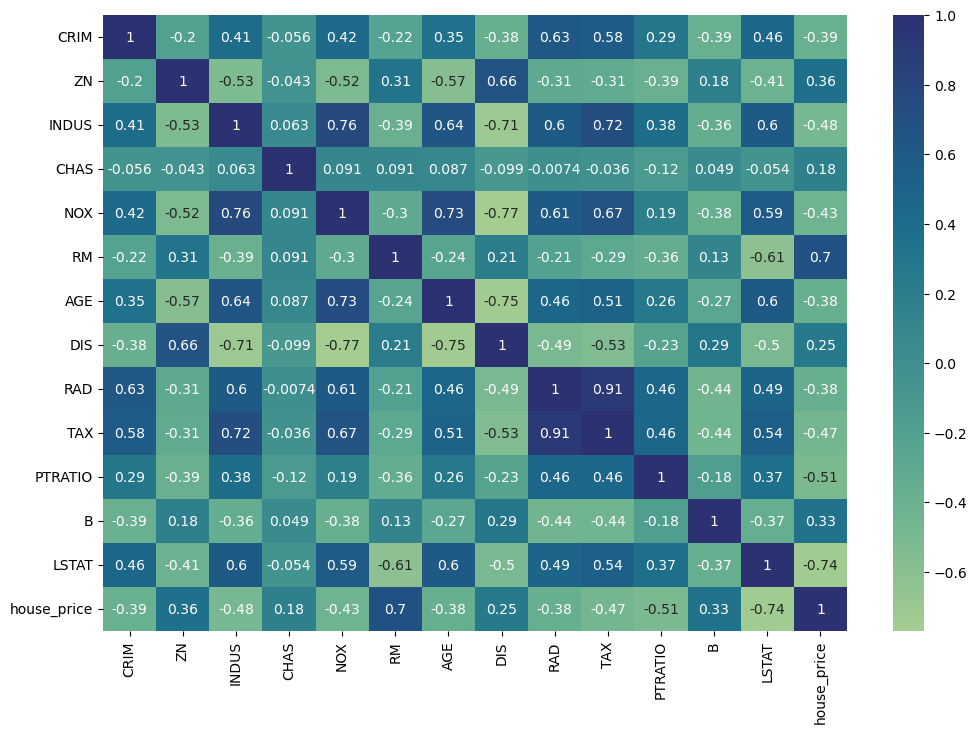

In [282]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True,cmap='crest')

In [284]:
data.shape

(506, 14)

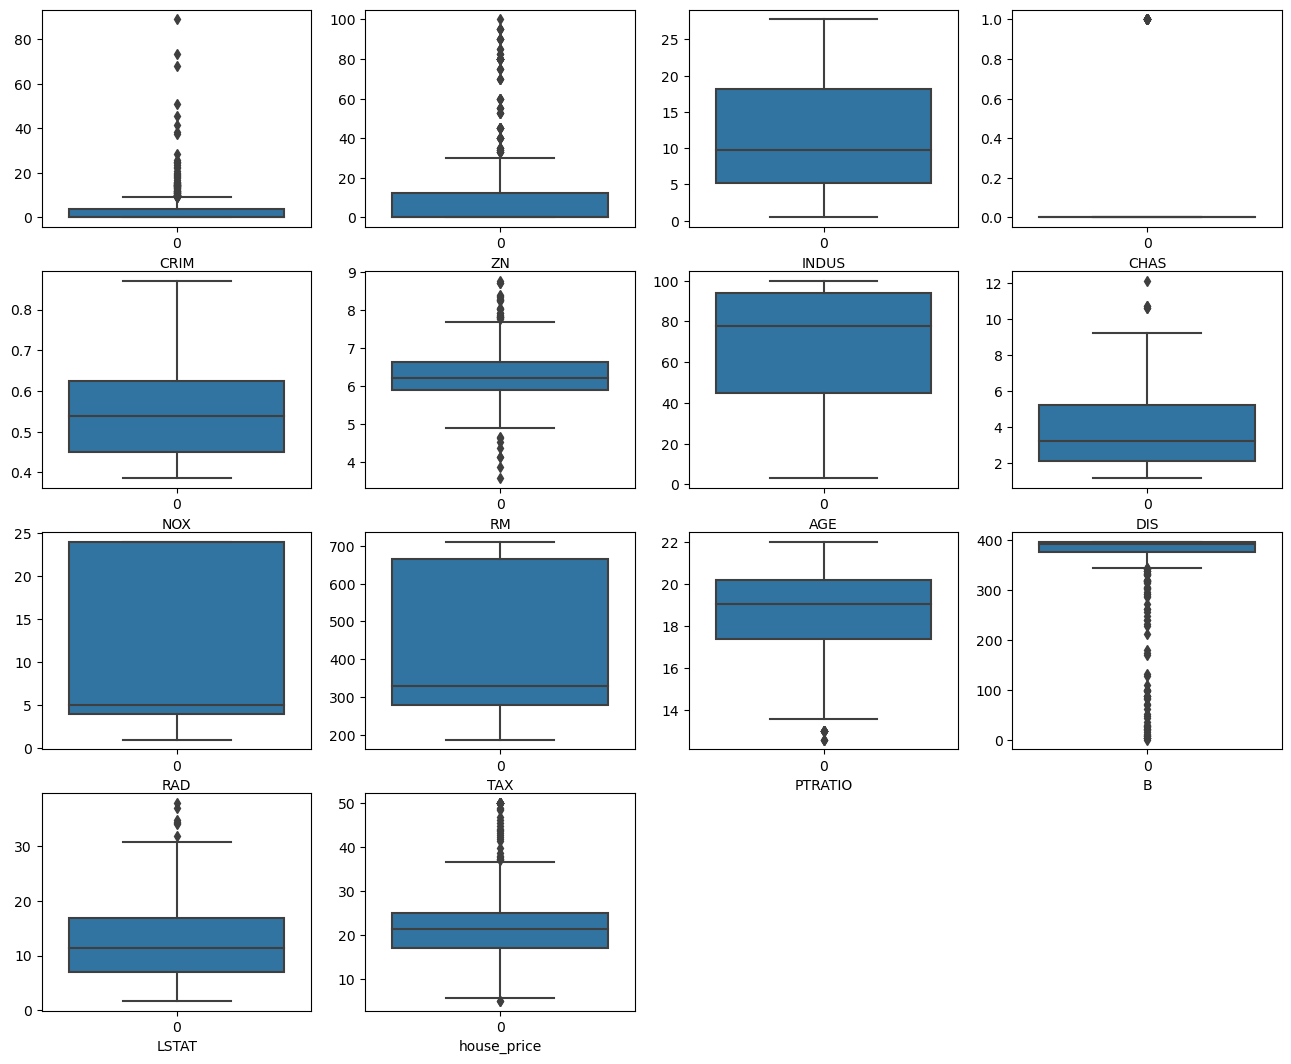

In [285]:
plt.figure(figsize=(16,13))
# plt.suptitle('Boxplot for all the columns')
cols = data.columns
for i in range(0,len(data.columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data[cols[i]])
    plt.xlabel(cols[i])

- From the above figure, it is clear that many of our features has outliers. if all these outliers are removed from that data, we might loose some very important information from data. So instead the model that is ran on the data can be tuned in such way that this outliers does not affect the model in negative manner.

#### Preprocessing:

In [286]:
X = data.drop(columns='house_price') #Independent features
y = data['house_price'] #Dependent feature

- Now we divide the data into training and testing.

In [287]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 10)

In [288]:
data.shape,X_train.shape,X_test.shape

((506, 14), (339, 13), (167, 13))

##### Feature Engineering:

In [289]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [290]:
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

- The standard scaler is fit on training data and the test data is transformed using mean and std of the training data. This is done to avoid data leakage.

#### Linear Regression Model

- As the data has more than one independent features, this is a multiple linear regression problem.
- Linear regression model defines a best fit line or plane(in multi-linear) for the available data points and calculates the value of cost function(Value of error) for each points and tries to minimize this error by changing the slope of line(or plane).
- The form of cost function depends on how data is distributed and if teh data has outliers. Most commonly used cost functions are MSE(Mean Squared Error), MAE(Mean Absolute Error), RMSE(Root Mean Squared Error) and Hubber Loss(combination of MSE and MAE).

In [291]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [292]:
model.fit(X_train_trans,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [293]:
prediction = model.predict(X_test_trans)

Text(0, 0.5, 'Prediction')

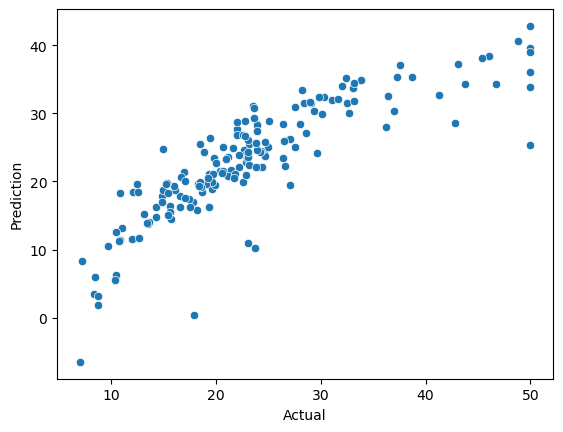

In [294]:
# Scatter plot of Actual and Predicted price
sns.scatterplot(x = y_test,y = prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')

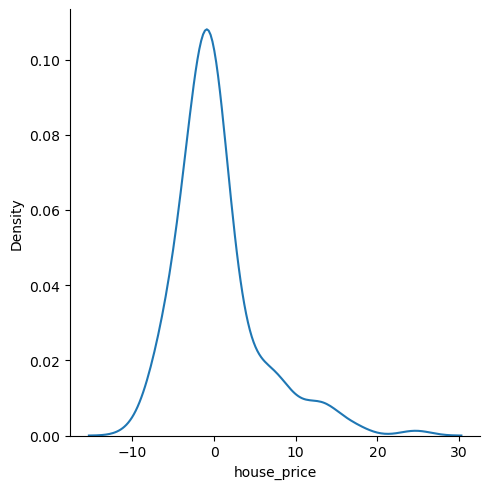

In [295]:
# Distribution of Residual
residual = y_test - prediction
sns.displot(residual,kind='kde') #Karnel Density Estimator

<AxesSubplot:ylabel='house_price'>

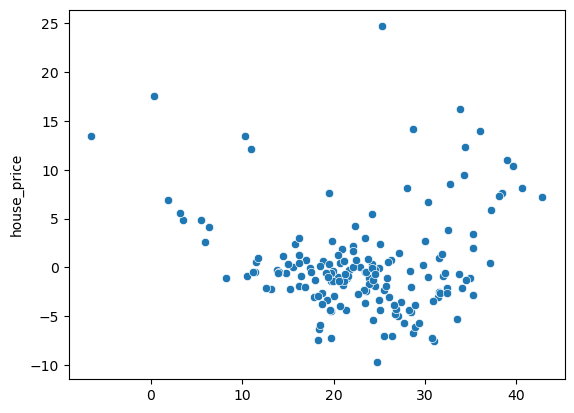

In [296]:
sns.scatterplot(x=prediction,y=residual)

In [297]:
# Error values
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('MSE:',mean_squared_error(y_test,prediction))
print('MAE:',mean_absolute_error(y_test,prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_test,prediction)))

MSE: 27.100991709962493
MAE: 3.520658529879791
RMSE: 5.205861284164465


In [298]:
#R2 score value
from sklearn.metrics import r2_score

def adjusted_r2(X_test,y_test,prediction):
    score = (1-(1-r2_score(y_test,prediction))*(len(y_test)-1)/(len(y_test)-X_test_trans.shape[1]-1))
    return score

- Performance of a regression model can analyzed by the values of R2 score and Adjusted R2 score. Closer this values to 1 is, better the model is.

In [299]:
print('R2_Score:',r2_score(y_test,prediction))
print('Adjusted R2:',adjusted_r2(X_test,y_test,prediction))

R2_Score: 0.7165219393967555
Adjusted R2: 0.6924355682343882


Value of all the coefficients:  {'LSTAT': -3.833920279669592, 'DIS': -3.311842480419835, 'TAX': -2.090056994707752, 'NOX': -1.7620532911340216, 'PTRATIO': -1.7609799035209428, 'CRIM': -1.2909921758143266, 'INDUS': -0.14031574005192426, 'AGE': 0.32268871488558715, 'CHAS': 0.3720186668143801, 'B': 1.251915144086314, 'ZN': 1.6094999873924285, 'RM': 2.2275221795054763, 'RAD': 2.7028810707990294}
Value of intercept:  22.077286135693246


Text(0.5, 1.0, 'Linear Regression Model Coefficients')

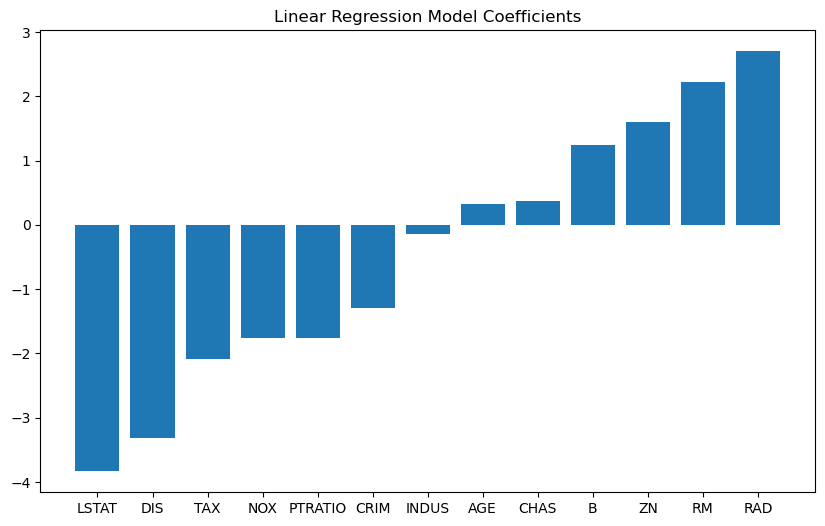

In [300]:
coeff_dict = {}
for i in range(len(X_train.columns)):
    coeff_dict[X_train.columns[i]] = list(model.coef_)[i]

coeff_dict = dict(sorted(coeff_dict.items(), key=lambda item: item[1]))
print('Value of all the coefficients: ',coeff_dict)
print('Value of intercept: ',model.intercept_)

plt.figure(figsize=(10,6))
plt.bar(x = coeff_dict.keys(),height = coeff_dict.values())
plt.title('Linear Regression Model Coefficients')

- Although there are many number of features in the data, the model coefficients are very high for RAD and RM. Hence they will contribute in the prediction the most, this can lead to a situation of overfitting. There are different ways of reducing model complexity and preventing overfitting in linear models. This includes ridge and lasso regression models.
- With regularization, the number of features used in training is kept constant, yet the magnitude of the coefficients is reduced.


#### Ridge Regression Model

- In Ridge regression, regularization is applied,the cost function is reduced by a penalty factor (term of square of slope). This is called shrinkage technique. Ridge regression is also referred to as L2 Regularization.
- If the data has outliers, it is better to use Ridge Regression Model.

In [301]:
from sklearn.linear_model import Ridge
model = Ridge()

In [302]:
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [303]:
prediction_ridge = model.predict(X_test)

Text(0, 0.5, 'Prediction')

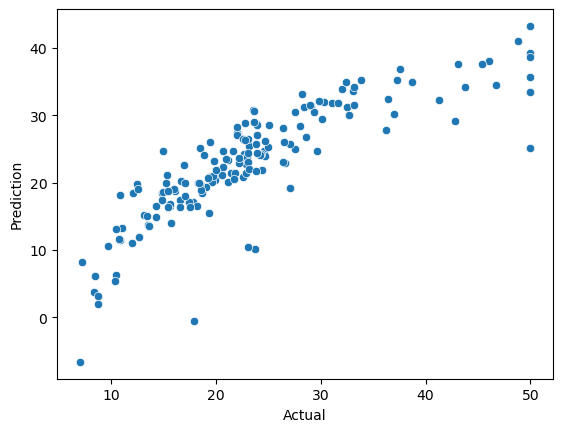

In [304]:
# Scatter plot of Actual and Predicted price
sns.scatterplot(x = y_test,y = prediction_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [305]:
# Error values
print('MSE:',mean_squared_error(y_test,prediction_ridge))
print('MAE:',mean_absolute_error(y_test,prediction_ridge))

MSE: 27.63979628041238
MAE: 3.5660420085939175


In [306]:
print('R2_Score:',r2_score(y_test,prediction_ridge))
print('Adjusted R2:',adjusted_r2(X_test,y_test,prediction_ridge))

R2_Score: 0.7108860100436922
Adjusted R2: 0.6863207690670124


Value of all the coefficients:  {'NOX': -7.7689848227001885, 'DIS': -1.4331943418896185, 'PTRATIO': -0.7345943846219737, 'LSTAT': -0.5549795066815258, 'CRIM': -0.15263206421654446, 'INDUS': -0.04618683467900567, 'TAX': -0.012715496845731537, 'AGE': 0.00468041987158973, 'B': 0.01368420907373668, 'ZN': 0.0672194813005571, 'RAD': 0.2876978528065088, 'CHAS': 1.4584482090601694, 'RM': 3.3913301775810187}
Value of intercept:  28.87881158390005


Text(0.5, 1.0, 'Ridge Regression Model Coefficients')

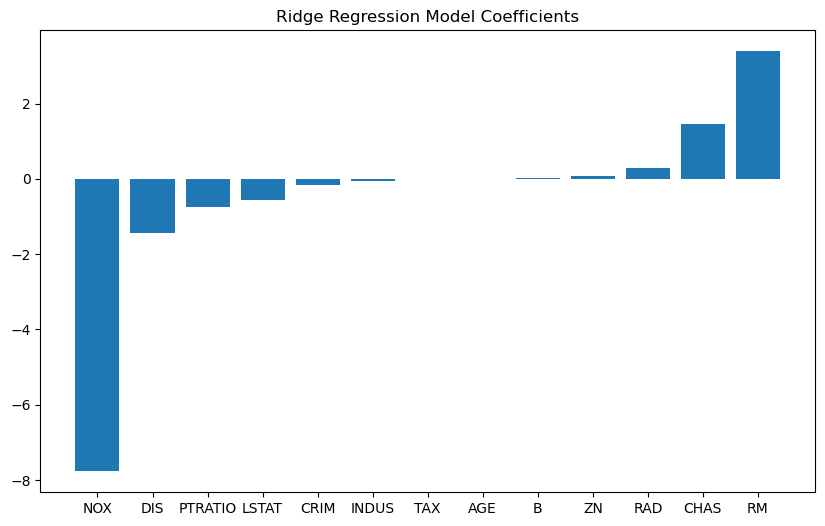

In [307]:
coeff_dict = {}
for i in range(len(X_train.columns)):
    coeff_dict[X_train.columns[i]] = list(model.coef_)[i]

coeff_dict = dict(sorted(coeff_dict.items(), key=lambda item: item[1]))
print('Value of all the coefficients: ',coeff_dict)
print('Value of intercept: ',model.intercept_)

plt.figure(figsize=(10,6))
plt.bar(x = coeff_dict.keys(),height = coeff_dict.values())
plt.title('Ridge Regression Model Coefficients')

#### Lasso Regression Model

- Lasso is short form for Least Absolute Shrinkage and Selection Operator.
- In Lasso regression, regularization is applied,the cost function is reduced by a penalty factor (term of slope). This model deals well with feature selection issue.

In [308]:
from sklearn.linear_model import Lasso
model = Lasso()

In [309]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [310]:
prediction_lasso = model.predict(X_test)

Text(0, 0.5, 'Prediction')

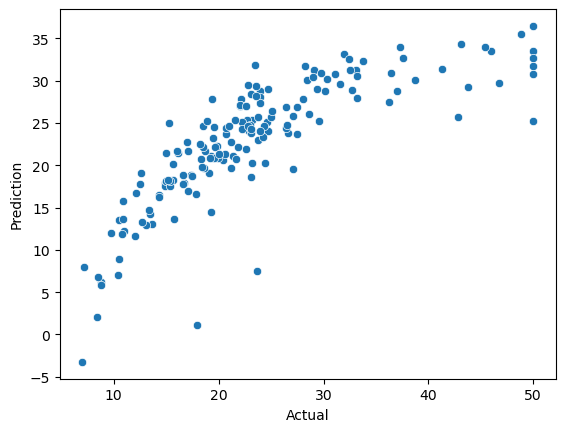

In [311]:
sns.scatterplot(x = y_test,y = prediction_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [312]:
# Error values
print('MSE:',mean_squared_error(y_test,prediction_lasso))
print('MAE:',mean_absolute_error(y_test,prediction_lasso))

MSE: 36.11332777156728
MAE: 4.067062767559683


In [313]:
print('R2_Score:',r2_score(y_test,prediction_lasso))
print('Adjusted R2:',adjusted_r2(X_test,y_test,prediction_lasso))

R2_Score: 0.6222523430812358
Adjusted R2: 0.5901561369378113


Value of all the coefficients:  {'DIS': -0.8012294419834005, 'LSTAT': -0.7634334384605491, 'PTRATIO': -0.5841057699758382, 'CRIM': -0.1047556323205127, 'INDUS': -0.01718276851580462, 'TAX': -0.015370574563057448, 'CHAS': 0.0, 'NOX': -0.0, 'B': 0.01011944132388759, 'AGE': 0.03023573135924627, 'ZN': 0.07649296835777025, 'RM': 0.2499351506477282, 'RAD': 0.2675592490197486}
Value of intercept:  41.983204728562384


Text(0.5, 1.0, 'Lasso Regression Model Coefficients')

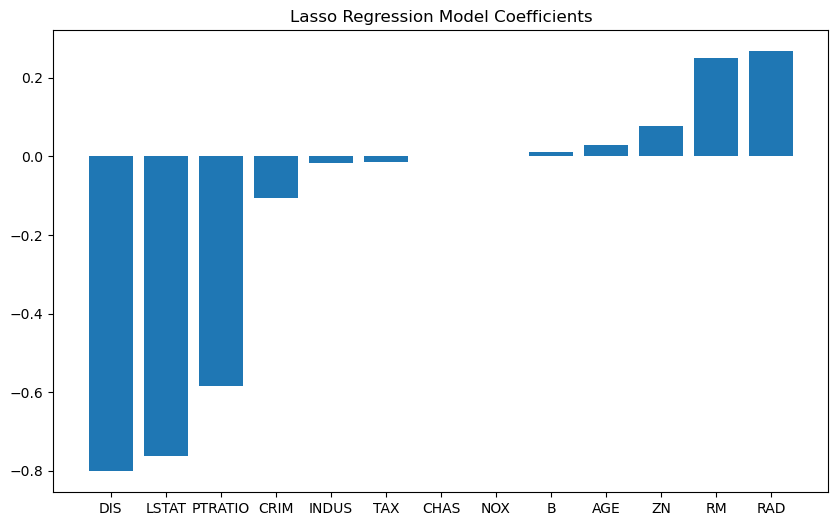

In [314]:
coeff_dict = {}
for i in range(len(X_train.columns)):
    coeff_dict[X_train.columns[i]] = list(model.coef_)[i]

coeff_dict = dict(sorted(coeff_dict.items(), key=lambda item: item[1]))
print('Value of all the coefficients: ',coeff_dict)
print('Value of intercept: ',model.intercept_)

plt.figure(figsize=(10,6))
plt.bar(x = coeff_dict.keys(),height = coeff_dict.values())
plt.title('Lasso Regression Model Coefficients')

#### Elastic Regression Model

This is combination of both Lasso and Ridge Regressions.

In [315]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()

In [316]:
model.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [317]:
prediction_elastic = model.predict(X_test)

Text(0, 0.5, 'Prediction')

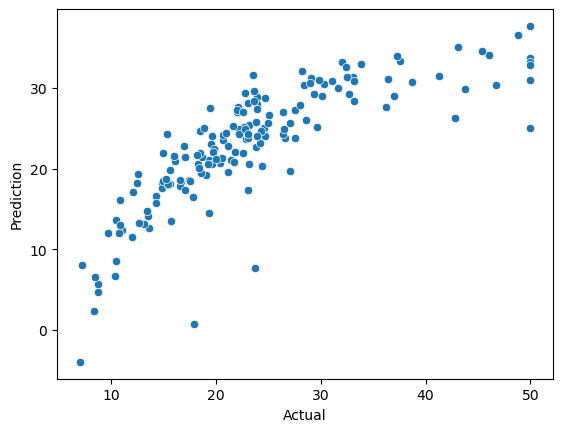

In [318]:
sns.scatterplot(x = y_test,y = prediction_elastic)
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [319]:
# Error values
print('MSE:',mean_squared_error(y_test,prediction_elastic))
print('MAE:',mean_absolute_error(y_test,prediction_elastic))

MSE: 34.654549683290305
MAE: 4.002630706596712


In [320]:
print('R2_Score:',r2_score(y_test,prediction_elastic))
print('Adjusted R2:',adjusted_r2(X_test,y_test,prediction_elastic))

R2_Score: 0.6375112527086368
Adjusted R2: 0.6067115552263642


Value of all the coefficients:  {'DIS': -0.8449818393174493, 'LSTAT': -0.7312768734724716, 'PTRATIO': -0.61704508605199, 'CRIM': -0.1215784767377629, 'INDUS': -0.03899045751499464, 'TAX': -0.015462064257915631, 'CHAS': 0.0, 'NOX': -0.0, 'B': 0.010827191093590066, 'AGE': 0.028933529613581293, 'ZN': 0.07459975063246753, 'RAD': 0.28961625964307225, 'RM': 0.7012320465035705}
Value of intercept:  39.51456077615767


Text(0.5, 1.0, 'Elastic Regression Model Coefficients')

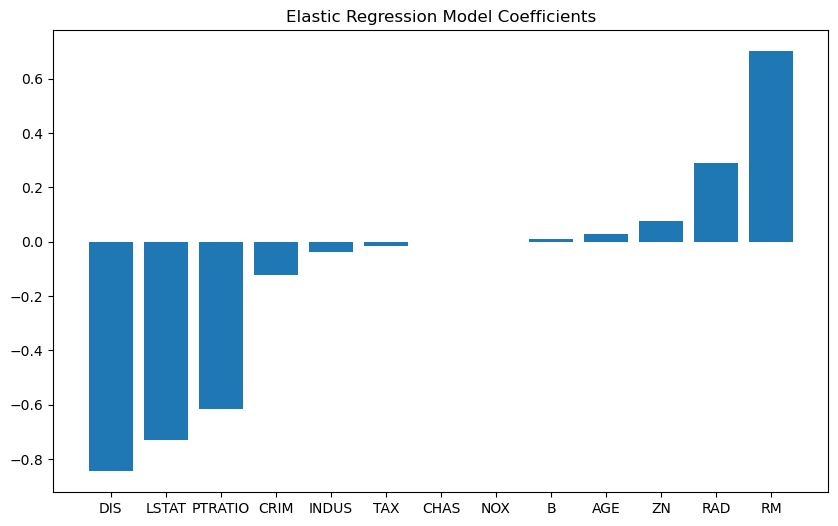

In [321]:
coeff_dict = {}
for i in range(len(X_train.columns)):
    coeff_dict[X_train.columns[i]] = list(model.coef_)[i]

coeff_dict = dict(sorted(coeff_dict.items(), key=lambda item: item[1]))
print('Value of all the coefficients: ',coeff_dict)
print('Value of intercept: ',model.intercept_)

plt.figure(figsize=(10,6))
plt.bar(x = coeff_dict.keys(),height = coeff_dict.values())
plt.title('Elastic Regression Model Coefficients')